- 数据处理
- 去除完全重复值
- 对日期取年月
- 同时删除（2字段有一个缺失的情况）

In [67]:
import numpy as np 
import pandas as pd
%matplotlib inline

In [68]:
#from numba import jit

In [69]:
sample_window = pd.read_csv("C:/Users/tyx51/Desktop/data3/CreditSampleWindow.csv")

In [70]:
print(sample_window.columns.values) 

['CID' 'STAGE_BEF' 'STAGE_AFT' 'START_DATE' 'CLOSE_DATE']


In [71]:
sample_window.shape

(1813157, 5)

In [81]:
sample_window.info

<bound method DataFrame.info of                 CID STAGE_BEF STAGE_AFT  START_DATE  CLOSE_DATE  STAGE_MONTH  \
0        CID0128273                  M0  20170701.0  20170703.0       201707   
1        CID0214787                  M0  20180201.0  20180204.0       201802   
2        CID0287932        M4        M5  20180501.0  20180531.0       201805   
3        CID0351850                  M0  20161002.0  20161005.0       201610   
4        CID0217310                  M0  20150601.0  20150602.0       201506   
5        CID0010329        M6        M7  20170128.0  20170227.0       201701   
6        CID0140008                  M0  20170801.0  20170802.0       201708   
7        CID0066926                  M0  20170201.0  20170204.0       201702   
8        CID0156186                  M0  20170701.0  20170704.0       201707   
9        CID0362128        M0        M1  20160504.0  20160510.0       201605   
10       CID0100237                  M0  20160901.0  20160904.0       201609   
11      

In [72]:
sample_window.head(10)  

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0
5,CID0010329,M6,M7,20170128.0,20170227.0
6,CID0140008,,M0,20170801.0,20170802.0
7,CID0066926,,M0,20170201.0,20170204.0
8,CID0156186,,M0,20170701.0,20170704.0
9,CID0362128,M0,M1,20160504.0,20160510.0


In [73]:
sample_window.drop_duplicates(inplace=True) # 去除  所有的值完全重复  的行 
sample_window.shape

(1813157, 5)

In [74]:
sample_window.dropna(subset=["STAGE_BEF","STAGE_AFT"],inplace=True)  #两字段有一个缺失就删除之 
sample_window.shape  

(1663660, 5)

In [75]:
sample_window.head(10)

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0
5,CID0010329,M6,M7,20170128.0,20170227.0
6,CID0140008,,M0,20170801.0,20170802.0
7,CID0066926,,M0,20170201.0,20170204.0
8,CID0156186,,M0,20170701.0,20170704.0
9,CID0362128,M0,M1,20160504.0,20160510.0


In [76]:
# 对日期取年月份
sample_window["STAGE_MONTH"] = sample_window.START_DATE.apply(lambda x: int(x//100))
sample_window["CLOSE_MONTH"] = sample_window.CLOSE_DATE.apply(lambda x: int(x//100))

In [77]:
sample_window["AFT_FLAG"] = sample_window.STAGE_AFT.apply(lambda x: int(x[-1]))

In [78]:
sample_window.head(10) 

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,STAGE_MONTH,CLOSE_MONTH,AFT_FLAG
0,CID0128273,,M0,20170701.0,20170703.0,201707,201707,0
1,CID0214787,,M0,20180201.0,20180204.0,201802,201802,0
2,CID0287932,M4,M5,20180501.0,20180531.0,201805,201805,5
3,CID0351850,,M0,20161002.0,20161005.0,201610,201610,0
4,CID0217310,,M0,20150601.0,20150602.0,201506,201506,0
5,CID0010329,M6,M7,20170128.0,20170227.0,201701,201702,7
6,CID0140008,,M0,20170801.0,20170802.0,201708,201708,0
7,CID0066926,,M0,20170201.0,20170204.0,201702,201702,0
8,CID0156186,,M0,20170701.0,20170704.0,201707,201707,0
9,CID0362128,M0,M1,20160504.0,20160510.0,201605,201605,1


In [79]:
sample_window.loc[sample_window.CLOSE_MONTH == 0,"CLOSE_MONTH"] = 201805

In [80]:
#解决warning 
import warnings
warnings.filterwarnings("ignore")

三国人物出场统计

In [1]:
import os
import jieba
f = open("三国演义.txt","rb")
txt = f.read()
words = jieba.lcut(txt) 


counts = {}
for word in words:
    if len(word) == 1:
        continue
    else:
        counts[word] = counts.get(word,0) + 1 
items = list(counts.items())
items.sort(key = lambda items: items[1], reverse = True)


for i in range(20):
    word, count =  items[i]
    print("{0:<15}{1:>5}".format(word,count))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\tyx51\AppData\Local\Temp\jieba.cache
Loading model cost 0.633 seconds.
Prefix dict has been built succesfully.


曹操               934
孔明               831
将军               760
却说               647
玄德               570
关公               509
丞相               488
二人               465
不可               435
荆州               419
孔明曰              385
玄德曰              383
不能               383
如此               376
张飞               348
商议               344
如何               336
主公               327
军士               309
吕布               299


继续优化改进

In [5]:
import os
import jieba
f = open("三国演义.txt","rb")
txt = f.read()
words = jieba.lcut(txt) 

counts = {}
for word in words:
    if len(word) == 1:
        continue
    else:
        counts[word] = counts.get(word,0) + 1 
        
        
excludes = ['却说','将军','商议','主公','吕布','军士','如此','如何','不能','天下','引兵','东吴','次日']
for word in excludes:
    del(counts[word])
        
        
        
items = list(counts.items())
items.sort(key = lambda items: items[1], reverse = True)

for i in range(20):
    word, count =  items[i]
    print("{0:<15}{1:>5}".format(word,count))

曹操               934
孔明               831
玄德               570
关公               509
丞相               488
二人               465
不可               435
荆州               419
孔明曰              385
玄德曰              383
张飞               348
左右               291
军马               289
刘备               271
大喜               265
孙权               264
云长               261
赵云               255
于是               250
今日               242


- 上海地铁导航
- BFS, DFS

In [268]:
simple_connection_info = {
    "世纪大道":["商城路","浦电路","东昌路"],
    "小南门":  ["陆家浜路"],
    "陆家浜路":["老西门"],
    "老西门":  ["豫园"],
    "豫园":    ["南京东路"],
    "南京东路":["豫园","陆家嘴"],
    "陆家嘴":  ["东昌路"],
    "东昌路":  ["世纪大道"],
    "商城路":  ["陆家浜路"],
    "浦电路":  ["小南门"]
} 

In [269]:
def search(start,destination,connection_grpah):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue 
        successors = connection_grpah[froninter]
            
        for stop in successors:
                new_path = path + [stop]
                pathes.append(new_path)
        if stop == destination: return new_path

In [270]:
search("世纪大道","小南门",simple_connection_info )

['世纪大道', '浦电路', '小南门']

汉字繁体转换成简体

In [100]:
import hanziconv

In [102]:
from hanziconv import HanziConv

In [ ]:
print(HanziConc.toSimplifield)

In [15]:
numbers = [3,4,5,6,7,88,78,89,24,44]

In [16]:
def mod_5(number):
    return number % 5 

In [21]:
mod_5(44)

4

In [18]:
sorted(numbers ,key = lambda x : x % 5)

[5, 6, 7, 3, 88, 78, 4, 89, 24, 44]

In [22]:
mod_5_lambda = lambda x : x % 5

In [23]:
mod_5_lambda

<function __main__.<lambda>(x)>

In [24]:
mod_5_lambda(19)

4

In [32]:
import numpy as np
import pandas as pd

In [35]:
df_raw_1 = pd.read_excel("D90-标准问-2019-5-13.xlsx")
df_raw_1.columns

Index(['一级目录', '二级目录', '三级目录', '关键词', '原始问', '标准问', '备注', '重复标准问', '答案'], dtype='object')

In [36]:
df_raw_1.shape

(708, 9)

In [38]:
df_raw_1.关键词.describe()

count     574
unique    162
top        订单
freq       76
Name: 关键词, dtype: object

In [46]:
df_raw_1.isnull()

,一级目录,二级目录,三级目录,关键词,原始问,标准问,备注,重复标准问,答案
0,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,True,True,True,False
5,False,False,False,False,False,True,True,True,False
6,False,False,False,False,False,True,True,True,False
7,False,False,False,False,False,True,True,True,False
8,False,False,False,False,False,True,True,True,False
9,False,False,False,False,False,True,True,True,False


input: string --> dict

In [204]:
test_string = "{name: '兰州',geoCoord: [103.73,36.03]},"

In [226]:
import re

In [227]:
pattern = r"name: '\w+'"

In [228]:
re.findall(pattern , test_string)

["name: '兰州'"]

In [229]:
pattern = r"name: '(\w+)'"

In [236]:
re.findall(pattern,test_string)

[]

In [237]:
test_string= r"name: '(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]"

In [238]:
re.findall(pattern,test_string)

[]

In [243]:
pattern = r"Coord:\[(d+.\d+),\s(\d+.\d+)\]"

In [244]:
re.findall(pattern,test_string)

[]

In [303]:
connection_grpah = {
    "北京":["太原"],
    "太原":["北京","西安","郑州"],
    "兰州":["西安"],
    "西安":["兰州","长沙"],
    "长沙":["福州","南宁"]
}

In [285]:
def search(start, destination,connection_grpah):
    pathes = [[start]]
    
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froninter =path[-1]
        
        if froninter is visited: continue 
        
        successors = connection_grpah[froninter]
        
        for city in successors:
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == destination: return new_path 
    

In [295]:
search("兰州","福州",connection_grpah)

['兰州', '西安', '长沙', '福州']

In [296]:
from collections import defaultdict

In [300]:
def bfs(grpah,start):
    visited = [start]
    seen = set()
    while visited:
        froninter = visited.pop(-1)
        
        if froninter in seen : continue 
        for successor in grpah[froninter]:
            if successor in seen: continue
            print(successor)
            
            visited += [successor] # DFS  每次扩展都扩展最新发现的点 1，23，57， 8
            visited = [successor] + visited  # BFS  每次扩展都考虑老的点，1,23,45,67,
            visited.append(successor)
            # 扩展顺序决定了是BFS or DFS 
        seen.add(froninter)       
    return visited     
# 队列 搜索路径 
# 

In [301]:
simple_connection_info = defaultdict(list)

In [304]:
bfs(simple_connection_info,"北京")

[]

In [305]:
threshold = 300

In [309]:
for c1 in city_location:
    for c2 in city_locaition:
        if c1 == c2 : continue 
            
        distance= get_geo_distance(c1, c2)
            
            if distance < threshold :
                city_connection[c1] .append(c2)
                city_connection[c2].append(c2)

IndentationError: unexpected indent (<ipython-input-309-0d99d6227133>, line 7)

In [310]:
city_connection

NameError: name 'city_connection' is not defined

In [ ]:
def transfer_stations_first(pathes):
    return sorted(pahtes, key = len(path))

In [ ]:
search("兰州","福州",simple_connection_info,sort_candidate = transfer_station_firt)

In [311]:
def shortest_path_first(pathes):
    def get_path_distance(path):
        didtance = 0
        for station in path[-1]:
            distance += get_geo_distance(station,path[-1])
        return sorted(pathes, key = get_path_distance)

In [312]:
 import requests 

In [314]:
from sklearn.datasets import load_boston

In [317]:
data = load_boston()

In [318]:
data 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [319]:
x,y = data["data"],data["target"]

In [327]:
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [329]:
y[1]

21.6

In [324]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [331]:
x[:,0]

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [333]:
len(x[:,0])

506

In [ ]:
%matplotlib inline

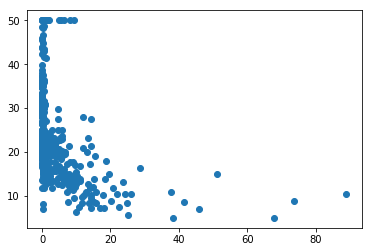

In [340]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],y);

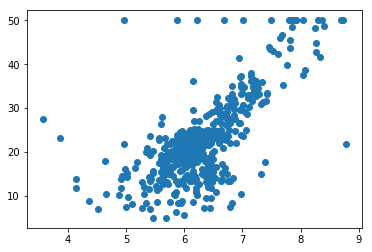

In [343]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x[:,5],y)

In [344]:
def draw_rm_and_price(): # 定义一个函数
    plt.scatter(x[:,5],y)   

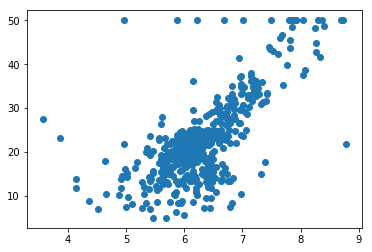

In [350]:
draw_rm_and_price()  # 图一

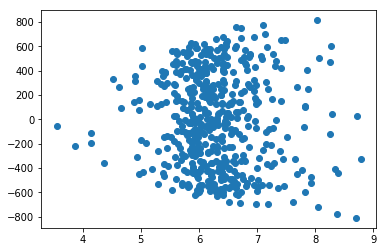

In [351]:
k = random.randint(-100,100)
b = random.randint(-100,100)
x_rm = x[:,5]
price_by_random_k_and_b = [price(r,k,b) for r in x_rm]
plt.scatter(x_rm, price_by_random_k_and_b);  #图二 

In [ ]:
# 将图一和图二 画在一起

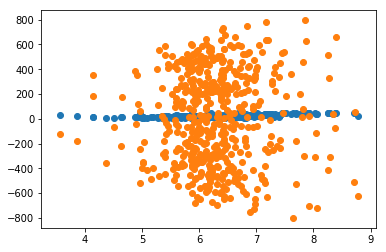

In [359]:
x_rm = x[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r,k,b) for r in x_rm]
draw_rm_and_price()

plt.scatter(x_rm, price_by_random_k_and_b);   


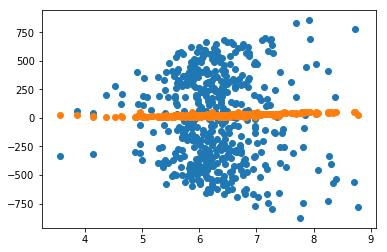

In [360]:
k = random.randint(-100,100)
b = random.randint(-100,100)

X_rm = x[:,5]

price_by_random_k_and_b = [price(r,k,b) for r in X_rm]

 
plt.scatter(X_rm,price_by_random_k_and_b); # 将f(x) 和 房屋数量和房价的散点图画在一起  试图预测这个函数是多少

draw_rm_and_price()

In [ ]:
- 数据
- 1.1 数据库
- 1.1.1 Mysql
- 1.1.2 
- 1.2 三方
- 1.3 爬取